In [277]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [278]:
PATH = '/content/drive/MyDrive/dataset/hand_language_dataset/train/'

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image
import os
import warnings
warnings.filterwarnings(action='ignore')

In [280]:
# Train Image Load 함수
def load_image(paths, opt="normal"):

    # path = path
    # images = []
    # for filename in glob(path +"*"):
    #     # print(filename)
    #     for img in glob(filename):
    #         # print(img)
    #         an_img = Image.open(img) #read img
    #         img_array = np.array(an_img) #img to array
    #         images.append(img_array) #append array to training_images
    # images = np.array(images)
    images = []
    for filename in paths:
        # print(filename)
        for img in glob(filename):
            # print(img)
            if(opt == "normal"):
              an_img = Image.open(img) #read img
            elif opt == "gray":
              an_img = Image.open(img).convert("L")
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to training_images
    images = np.array(images)
    return images

In [281]:
train_label = pd.read_csv(os.path.join('/content/drive/MyDrive/dataset/hand_language_dataset/', 'train.csv'))
train_label.head()

,file_name,label
0,001.png,10-2
1,002.png,10-1
2,003.png,3
3,004.png,8
4,005.png,9


In [282]:
print(train_label.shape)
print(train_label['label'].nunique(), train_label['label'].unique())

(858, 2)
11 ['10-2' '10-1' '3' '8' '9' '5' '2' '4' '7' '6' '1']


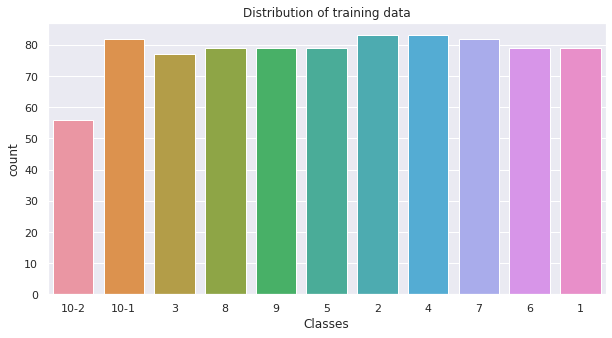

In [283]:
plt.figure(figsize=[10,5])
sns.countplot(train_label.label.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

In [284]:
train_label['label'][train_label['label'] == '10-1'] = 10 ## label : 10-1 -> 10
train_label['label'][train_label['label'] == '10-2'] = 0 ## Label : 10-2 -> 0
train_label['label'] = train_label['label'].apply(lambda x : int(x)) ## Dtype : object -> int

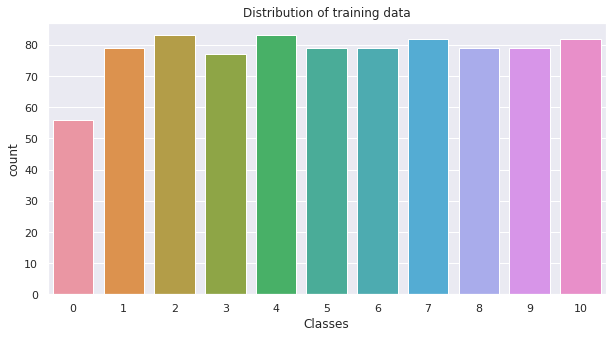

In [285]:
plt.figure(figsize=[10,5])
sns.countplot(train_label.label.ravel())
plt.title('Distribution of training data')
plt.xlabel('Classes')
plt.show()

In [286]:
# Train Image 시각화 함수
def show_image(image):
  img_rgb = image

  plt.figure(figsize=(10, 2))

  plt.subplot(1, 4, 1)
  plt.imshow(img_rgb[50:200, 50:200, :])
  plt.axis("off")
  plt.title("RGB Image")

  plt.subplot(1, 4, 2)
  plt.imshow(img_rgb[:, :, 0], cmap=plt.cm.Reds)
  plt.axis("off")
  plt.title("R channel")

  plt.subplot(1, 4, 3)
  plt.imshow(img_rgb[:, :, 1], cmap=plt.cm.Greens)
  plt.axis("off")
  plt.title("G channel")

  plt.subplot(1, 4, 4)
  plt.imshow(img_rgb[:, :, 2], cmap=plt.cm.Blues)
  plt.axis("off")
  plt.title("B channel")

  plt.show()

In [125]:
img_list = []
for filename in glob(os.path.join(PATH) +"*"):
        img_list.append(filename)
img_list.sort(key=lambda x:int(x.split('/')[-1].split('.')[0]))

In [292]:
train_image = load_image(img_list,"gray")

In [293]:
train_image.shape

(858, 224, 224)

[[199 180 193 ... 144 154 140]
 [189 199 180 ... 148 143 144]
 [177 194 193 ... 145 136 144]
 ...
 [207 209 205 ...  88 124 116]
 [186 210 208 ... 115 124 151]
 [200 199 197 ... 136 170  94]]


(224, 224)

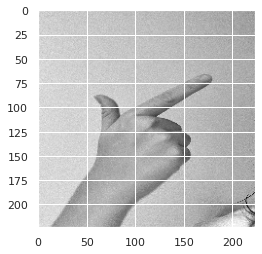

In [294]:
plt.imshow(train_image[50],cmap = 'gray')
import cv2
cv2.imwrite("./train_image[0].png", train_image[0])
print(train_image[50])
train_image[50].shape

In [261]:
#show_image(train_image[0])

# normal cnn

In [262]:
from tensorflow.keras.utils import to_categorical
#datax = train_image
datax = train_image
datay = train_label.iloc[:,1]
datay_onehot = to_categorical(datay)

In [263]:
print(datax.shape)
print(datay.shape)

(858, 224, 224, 3)
(858,)


In [264]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay_onehot, test_size = 0.25, random_state =111)
print(f"trnx.shape: {trnx.shape}")
print(f"tstx.shape: {tstx.shape}")
print(f"trny.shape: {trny.shape}")
print(f"tsty.shape: {tsty.shape}")

trnx.shape: (643, 224, 224, 3)
tstx.shape: (215, 224, 224, 3)
trny.shape: (643, 11)
tsty.shape: (215, 11)


In [270]:
# 입력값들을 CNN에 넣기 위해 4D tensor로 변환 (row, height, width, depth)
trnx_reshaped = trnx.reshape(-1,trnx.shape[2],trnx.shape[1],3)
tstx_reshaped = tstx.reshape(-1,tstx.shape[2],tstx.shape[1],3)
print(trnx_reshaped.shape)
print(tstx_reshaped.shape)
print(trny.shape)
print(tsty.shape)



(643, 224, 224, 3)
(215, 224, 224, 3)
(643, 11)
(215, 11)


In [271]:
# from tensorflow.keras import layers, models, optimizers
# input_shape = (trnx.shape[2],trnx.shape[1],3)
# print(input_shape)
# cnn_model = models.Sequential()

# cnn_model.add(layers.Conv2D(8,(2,2), padding='same', input_shape=input_shape))
# #cnn_model.add(layers.GaussianNoise(0.1, input_shape=input_shape))
# #cnn_model.add(layers.Conv2D(8,(2,2), padding='same'))

# cnn_model.add(layers.BatchNormalization())
# cnn_model.add(layers.Activation("relu"))
# cnn_model.add(layers.MaxPooling2D((2,2)))

# cnn_model.add(layers.Conv2D(32,(2,2), padding='same'))
# cnn_model.add(layers.BatchNormalization())
# cnn_model.add(layers.Activation("relu"))
# #cnn_model.add(layers.Dropout(0.2))
# cnn_model.add(layers.MaxPooling2D((2,2)))


# cnn_model.add(layers.Conv2D(64,(3,3), padding='same'))
# cnn_model.add(layers.BatchNormalization())
# cnn_model.add(layers.Activation("relu"))
# #cnn_model.add(layers.Dropout(0.2))
# cnn_model.add(layers.MaxPooling2D((2,2)))

# cnn_model.add(layers.Conv2D(128,(18,18), padding='same'))
# cnn_model.add(layers.BatchNormalization())
# cnn_model.add(layers.Activation("relu"))
# #cnn_model.add(layers.Dropout(0.2))
# cnn_model.add(layers.MaxPooling2D((2,2)))

# cnn_model.add(layers.Conv2D(64,(8,8), padding='same'))
# cnn_model.add(layers.BatchNormalization())
# cnn_model.add(layers.Activation("relu"))
# #cnn_model.add(layers.Dropout(0.2))
# cnn_model.add(layers.MaxPooling2D((2,2)))


# cnn_model.add(layers.Conv2D(32,(4,4), padding='same'))
# cnn_model.add(layers.BatchNormalization())
# cnn_model.add(layers.Activation("relu"))
# #cnn_model.add(layers.Dropout(0.2))
# cnn_model.add(layers.MaxPooling2D((2,2)))

# cnn_model.add(layers.Flatten())
# cnn_model.add(layers.Dense(units = 1000, activation = "relu"))

# cnn_model.add(layers.Dense(units = 500, activation = "relu"))
# cnn_model.add(layers.Dense(units = 200, activation = "relu"))
# cnn_model.add(layers.Dense(units = 100, activation = "relu"))

# cnn_model.add(layers.Dense(units = 11, activation = "softmax"))

(224, 224, 3)


In [295]:
from tensorflow.keras import layers, models, optimizers

input_shape = (trnx.shape[2],trnx.shape[1],3)
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(8,(2,2), padding='same', input_shape=input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(16,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))


cnn_model.add(layers.Conv2D(24,(3,3), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))


cnn_model.add(layers.Conv2D(32,(4,4), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 1000, activation = "relu"))
cnn_model.add(layers.Dense(units = 11, activation = "softmax"))

In [296]:
# opt = optimizers.Adam(learning_rate=0.001)
cnn_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [297]:
cnn_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_134 (Conv2D)         (None, 224, 224, 8)       104       
                                                                 
 batch_normalization_123 (Ba  (None, 224, 224, 8)      32        
 tchNormalization)                                               
                                                                 
 activation_134 (Activation)  (None, 224, 224, 8)      0         
                                                                 
 max_pooling2d_134 (MaxPooli  (None, 112, 112, 8)      0         
 ng2D)                                                           
                                                                 
 conv2d_135 (Conv2D)         (None, 112, 112, 16)      528       
                                                                 
 batch_normalization_124 (Ba  (None, 112, 112, 16)   

In [298]:
histroy = cnn_model.fit(trnx_reshaped, trny, validation_data = [tstx_reshaped,tsty], batch_size = 30, epochs = 100)

Epoch 1/100
22/22 [==============================] - 2s 45ms/step - loss: 8.2400 - accuracy: 0.1820 - val_loss: 5.4191 - val_accuracy: 0.1209
Epoch 2/100
22/22 [==============================] - 1s 31ms/step - loss: 1.9160 - accuracy: 0.3577 - val_loss: 3.1634 - val_accuracy: 0.1209
Epoch 3/100
22/22 [==============================] - 1s 30ms/step - loss: 1.1749 - accuracy: 0.5925 - val_loss: 2.9828 - val_accuracy: 0.1349
Epoch 4/100
22/22 [==============================] - 1s 31ms/step - loss: 0.8569 - accuracy: 0.6890 - val_loss: 2.8106 - val_accuracy: 0.1814
Epoch 5/100
22/22 [==============================] - 1s 30ms/step - loss: 0.5913 - accuracy: 0.8165 - val_loss: 2.0120 - val_accuracy: 0.3116
Epoch 6/100
22/22 [==============================] - 1s 31ms/step - loss: 0.4440 - accuracy: 0.8725 - val_loss: 2.0237 - val_accuracy: 0.3023
Epoch 7/100
22/22 [==============================] - 1s 30ms/step - loss: 0.3945 - accuracy: 0.8678 - val_loss: 1.9068 - val_accuracy: 0.3488
Epoch 

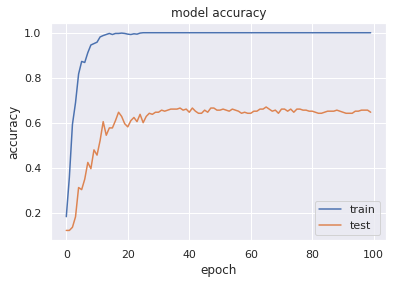

In [299]:
# Model Performance (Measurement = Accuracy)
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

# 데이터 증강(실패)


In [ ]:
import tensorflow as tf

In [ ]:
data_path = glob(os.path.join(PATH, 'train/*.png'))
path = data_path[1]

gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [ ]:
image.shape

TensorShape([224, 224, 3])

In [ ]:
#2. Set Data Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#datagenerator 생성
datagenerator = ImageDataGenerator(
    rescale=1/255.,
    rotation_range = 20, 
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    horizontal_flip = True
)

In [ ]:
# 이미지를 int(0 ~ 255)에서 float(0 ~ 1)으로 변환
img_tensor = tf.keras.preprocessing.image.img_to_array(image)
img_tensor = img_tensor / 255.

In [ ]:
img_tensor = img_tensor[tf.newaxis, ...]
img_tensor.shape
image_result = next(iter(datagenerator.flow(img_tensor)))

In [ ]:
image_trans = image[tf.newaxis, ...]
image_trans.shape
image_result = next(iter(datagenerator.flow(image_trans)))

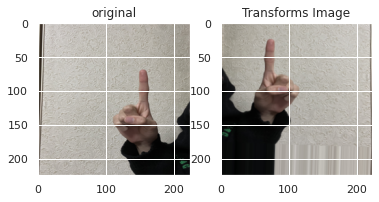

In [ ]:
plt.subplot(1, 2, 1)
plt.title('original')
plt.imshow(np.squeeze(image), 'gray')
plt.subplot(1, 2, 2)
plt.title('Transforms Image')
plt.imshow(np.squeeze(image_result), 'gray')
plt.show()

In [ ]:
i = 0
for batch in datagenerator.flow(image_trans, batch_size=1,
                          save_to_dir='/content/preview', save_prefix='sample', save_format='png'):
    i += 1
    print(i)
    if i > 20:
        break  # 이미지 20장을 생성하고 마칩니다

# 데이터 증강(flow_from_directory)

In [ ]:
train_label.head()

,file_name,label
0,001.png,0
1,002.png,10
2,003.png,3
3,004.png,8
4,005.png,9


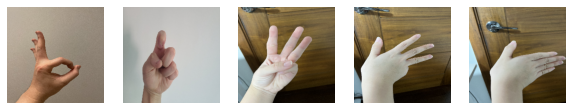

In [ ]:
plt.figure(figsize=(10, 2))

plt.subplot(1, 5, 1)
plt.imshow(train_image[0])
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(train_image[1])
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(train_image[2])
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(train_image[3])
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(train_image[4])
plt.axis("off")

plt.show()

In [ ]:
import cv2

cv2.imwrite("imgs/Lenna_GrayScale.png", img)

In [ ]:
AUG_PATH = '/content/drive/MyDrive/Colab Notebooks/data/hand_language_dataset/train_aug'
for i in range(len(train_label)):
  index = train_label['label'][i]
  file_name = train_label['file_name'][i]
  cv2.imwrite(os.path.join(AUG_PATH, str(index), file_name), cv2.cvtColor(train_image[i], cv2.COLOR_RGB2BGR))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train ImageDataGenerator
train_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               validation_split=0.3)

train_flow_gen = train_gen.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/data/hand_language_dataset/train_aug',
                                              target_size=(224, 224),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              class_mode='categorical',
                                              batch_size=32,
                                              shuffle=True,
                                              subset='training')

valid_flow_gen = train_gen.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/data/hand_language_dataset/train_aug',
                                              target_size=(224, 224),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              class_mode='categorical',
                                              batch_size=32,
                                              shuffle=False,
                                              subset='validation')

Found 608 images belonging to 11 classes.
Found 250 images belonging to 11 classes.


### 증강1

In [ ]:
from tensorflow.keras import layers, models, optimizers
input_shape = (trnx.shape[2],trnx.shape[1],3)
print(input_shape)
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(8,(2,2), padding='same', input_shape=input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(16,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))


cnn_model.add(layers.Conv2D(24,(3,3), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))


cnn_model.add(layers.Conv2D(32,(4,4), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 1000, activation = "relu"))
cnn_model.add(layers.Dense(units = 11, activation = "softmax"))

(224, 224, 3)


In [ ]:
# opt = optimizers.Adam(learning_rate=0.001)
cnn_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 224, 224, 8)       104       
                                                                 
 batch_normalization_24 (Bat  (None, 224, 224, 8)      32        
 chNormalization)                                                
                                                                 
 activation_45 (Activation)  (None, 224, 224, 8)       0         
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 112, 112, 16)      528       
                                                                 
 batch_normalization_25 (Bat  (None, 112, 112, 16)   

In [ ]:
histroy = cnn_model.fit_generator(train_flow_gen, epochs = 50, validation_data = valid_flow_gen)

Epoch 1/50
19/19 [==============================] - 12s 668ms/step - loss: 6.3423 - accuracy: 0.1151 - val_loss: 2.4345 - val_accuracy: 0.0960
Epoch 2/50
19/19 [==============================] - 12s 630ms/step - loss: 2.3934 - accuracy: 0.1464 - val_loss: 2.4150 - val_accuracy: 0.1000
Epoch 3/50
19/19 [==============================] - 12s 632ms/step - loss: 2.2057 - accuracy: 0.2303 - val_loss: 2.4192 - val_accuracy: 0.0960
Epoch 4/50
19/19 [==============================] - 12s 636ms/step - loss: 2.0858 - accuracy: 0.2730 - val_loss: 2.4392 - val_accuracy: 0.0920
Epoch 5/50
19/19 [==============================] - 12s 637ms/step - loss: 1.9762 - accuracy: 0.3141 - val_loss: 2.5138 - val_accuracy: 0.0920
Epoch 6/50
19/19 [==============================] - 12s 631ms/step - loss: 1.8251 - accuracy: 0.3635 - val_loss: 2.5067 - val_accuracy: 0.0920
Epoch 7/50
19/19 [==============================] - 12s 642ms/step - loss: 1.7100 - accuracy: 0.3898 - val_loss: 2.5165 - val_accuracy: 0.1280

In [ ]:
histroy4 = aug_model3.fit_generator(train_flow_gen, validation_data = valid_flow_gen, epochs = 100)

Epoch 1/100
19/19 [==============================] - 14s 678ms/step - loss: 25.2075 - accuracy: 0.1135 - val_loss: 2.4189 - val_accuracy: 0.0960
Epoch 2/100
19/19 [==============================] - 12s 632ms/step - loss: 3.1142 - accuracy: 0.1431 - val_loss: 2.3920 - val_accuracy: 0.1120
Epoch 3/100
19/19 [==============================] - 12s 633ms/step - loss: 2.1940 - accuracy: 0.2286 - val_loss: 2.3973 - val_accuracy: 0.1160
Epoch 4/100
19/19 [==============================] - 12s 630ms/step - loss: 2.0783 - accuracy: 0.2796 - val_loss: 2.4187 - val_accuracy: 0.0920
Epoch 5/100
19/19 [==============================] - 12s 641ms/step - loss: 1.9804 - accuracy: 0.3240 - val_loss: 2.4406 - val_accuracy: 0.0920
Epoch 6/100
19/19 [==============================] - 12s 625ms/step - loss: 1.8455 - accuracy: 0.3618 - val_loss: 2.5029 - val_accuracy: 0.0920
Epoch 7/100
19/19 [==============================] - 12s 644ms/step - loss: 1.7967 - accuracy: 0.3914 - val_loss: 2.5102 - val_accuracy

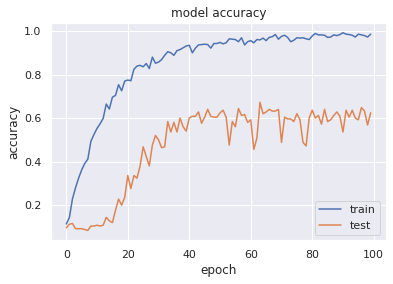

In [ ]:
# Model Performance (Measurement = Accuracy)
plt.plot(histroy4.history['accuracy'])
plt.plot(histroy4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

### 증강4

In [ ]:
train_gen = ImageDataGenerator(rescale = 1./255,
                              rotation_range = 20, 
                              width_shift_range = 0.2, 
                              height_shift_range = 0.2, 
                              horizontal_flip = True,
                              validation_split=0.3)

train_flow_gen = train_gen.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/data/hand_language_dataset/train_aug',
                                              target_size=(224, 224),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              class_mode='categorical',
                                              batch_size=32,
                                              shuffle=True,
                                              subset='training')

valid_flow_gen = train_gen.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/data/hand_language_dataset/train_aug',
                                              target_size=(224, 224),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              class_mode='categorical',
                                              batch_size=32,
                                              shuffle=False,
                                              subset='validation')

Found 608 images belonging to 11 classes.
Found 250 images belonging to 11 classes.


In [ ]:
from tensorflow.keras import layers, models, optimizers
input_shape = (trnx.shape[2],trnx.shape[1],3)
print(input_shape)
aug_model4 = models.Sequential()

aug_model4.add(layers.Conv2D(8,(2,2), padding='same', input_shape=input_shape))
aug_model4.add(layers.BatchNormalization())
aug_model4.add(layers.Activation("relu"))
aug_model4.add(layers.MaxPooling2D((2,2)))

aug_model4.add(layers.Conv2D(16,(2,2), padding='same'))
aug_model4.add(layers.BatchNormalization())
aug_model4.add(layers.Activation("relu"))
aug_model4.add(layers.Dropout(0.2))
aug_model4.add(layers.MaxPooling2D((2,2)))


aug_model4.add(layers.Conv2D(24,(3,3), padding='same'))
aug_model4.add(layers.BatchNormalization())
aug_model4.add(layers.Activation("relu"))
aug_model4.add(layers.Dropout(0.2))
aug_model4.add(layers.MaxPooling2D((2,2)))


aug_model4.add(layers.Conv2D(32,(4,4), padding='same'))
aug_model4.add(layers.BatchNormalization())
aug_model4.add(layers.Activation("relu"))
aug_model4.add(layers.Dropout(0.2))
aug_model4.add(layers.MaxPooling2D((2,2)))

aug_model4.add(layers.Flatten())

aug_model4.add(layers.Dense(units = 1000, activation = "relu"))
aug_model4.add(layers.Dense(units = 11, activation = "softmax"))

(224, 224, 3)


In [ ]:
# opt = optimizers.Adam(learning_rate=0.001)
aug_model4.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
aug_model4.summary()

In [ ]:
histroy5 = aug_model4.fit_generator(train_flow_gen, validation_data = valid_flow_gen, epochs = 100)

Epoch 1/100
19/19 [==============================] - 14s 680ms/step - loss: 12.7784 - accuracy: 0.0822 - val_loss: 2.4240 - val_accuracy: 0.1320
Epoch 2/100
19/19 [==============================] - 12s 655ms/step - loss: 2.6392 - accuracy: 0.1069 - val_loss: 2.4181 - val_accuracy: 0.0920
Epoch 3/100
19/19 [==============================] - 12s 648ms/step - loss: 2.3656 - accuracy: 0.1234 - val_loss: 2.4061 - val_accuracy: 0.0920
Epoch 4/100
19/19 [==============================] - 12s 665ms/step - loss: 2.3384 - accuracy: 0.1645 - val_loss: 2.4546 - val_accuracy: 0.0920
Epoch 5/100
19/19 [==============================] - 12s 642ms/step - loss: 2.3100 - accuracy: 0.1464 - val_loss: 2.4792 - val_accuracy: 0.0920
Epoch 6/100
19/19 [==============================] - 12s 647ms/step - loss: 2.2443 - accuracy: 0.1826 - val_loss: 2.5244 - val_accuracy: 0.0920
Epoch 7/100
19/19 [==============================] - 12s 642ms/step - loss: 2.2403 - accuracy: 0.2023 - val_loss: 2.5370 - val_accuracy

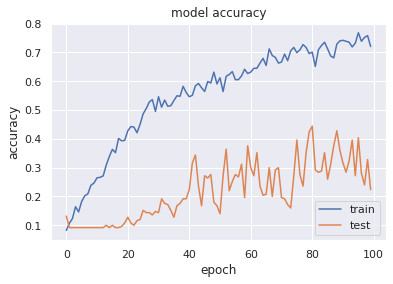

In [ ]:
# Model Performance (Measurement = Accuracy)
plt.plot(histroy5.history['accuracy'])
plt.plot(histroy5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

### 증강5

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Train ImageDataGenerator
train_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               horizontal_flip = True,
                               validation_split=0.3)

train_flow_gen = train_gen.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/data/hand_language_dataset/train_aug',
                                              target_size=(224, 224),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              class_mode='categorical',
                                              batch_size=32,
                                              shuffle=True,
                                              subset='training')

valid_flow_gen = train_gen.flow_from_directory(directory='/content/drive/MyDrive/Colab Notebooks/data/hand_language_dataset/train_aug',
                                              target_size=(224, 224),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              class_mode='categorical',
                                              batch_size=32,
                                              shuffle=False,
                                              subset='validation')

Found 608 images belonging to 11 classes.
Found 250 images belonging to 11 classes.


In [ ]:
from tensorflow.keras import layers, models, optimizers
input_shape = (trnx.shape[2],trnx.shape[1],3)
print(input_shape)
cnn_model = models.Sequential()

cnn_model.add(layers.Conv2D(8,(2,2), padding='same', input_shape=input_shape))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(16,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))


cnn_model.add(layers.Conv2D(24,(3,3), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))


cnn_model.add(layers.Conv2D(32,(4,4), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 1000, activation = "relu"))
cnn_model.add(layers.Dense(units = 11, activation = "softmax"))

# opt = optimizers.Adam(learning_rate=0.001)
cnn_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

(224, 224, 3)


In [ ]:
cnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 224, 224, 8)       104       
                                                                 
 batch_normalization_28 (Bat  (None, 224, 224, 8)      32        
 chNormalization)                                                
                                                                 
 activation_28 (Activation)  (None, 224, 224, 8)       0         
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 16)      528       
                                                                 
 batch_normalization_29 (Bat  (None, 112, 112, 16)    

In [ ]:
histroy = cnn_model.fit_generator(train_flow_gen, validation_data = valid_flow_gen, epochs = 50)

Epoch 1/50
 6/19 [========>.....................] - ETA: 3:02 - loss: 17.2733 - accuracy: 0.1094

KeyboardInterrupt: ignored

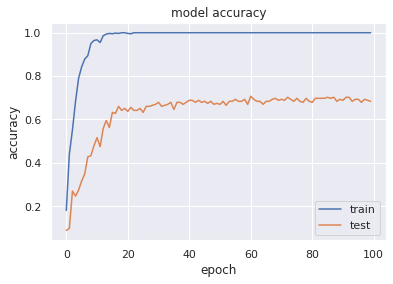

In [ ]:
# Model Performance (Measurement = Accuracy)
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

# dkdkdkd

In [ ]:
train_label.head()

,file_name,label
0,001.png,10-2
1,002.png,10-1
2,003.png,3
3,004.png,8
4,005.png,9


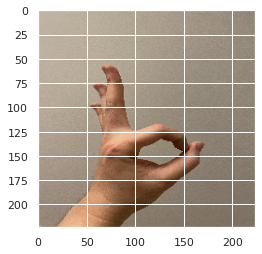

In [ ]:
plt.imshow(train_image[0])

In [ ]:
temp = train_image[0]/255.

In [ ]:
noise = tf.random.normal(shape=(224,224,3), mean=0.0, stddev=.25, dtype=tf.float32)
temp += noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


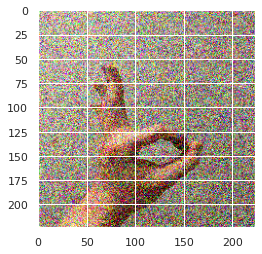

In [ ]:
plt.imshow(temp)

In [ ]:
from tensorflow.keras.utils import to_categorical
#datax = train_image
datax = train_image
datay = train_label.iloc[:,1]
datay_onehot = to_categorical(datay)

In [ ]:
print(datax.shape)
print(datay.shape)

(858, 224, 224, 3)
(858,)


In [ ]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay_onehot, test_size = 0.25, random_state =111)
print(f"trnx.shape: {trnx.shape}")
print(f"tstx.shape: {tstx.shape}")
print(f"trny.shape: {trny.shape}")
print(f"tsty.shape: {tsty.shape}")

trnx.shape: (643, 224, 224, 3)
tstx.shape: (215, 224, 224, 3)
trny.shape: (643, 11)
tsty.shape: (215, 11)


In [ ]:
# 입력값들을 CNN에 넣기 위해 4D tensor로 변환 (row, height, width, depth)
trnx_reshaped = trnx.reshape(-1,trnx.shape[2],trnx.shape[1],3)
tstx_reshaped = tstx.reshape(-1,tstx.shape[2],tstx.shape[1],3)
print(trnx_reshaped.shape)
print(tstx_reshaped.shape)
print(trny.shape)
print(tsty.shape)



(643, 224, 224, 3)
(215, 224, 224, 3)
(643, 11)
(215, 11)


In [ ]:
from tensorflow.keras import layers, models, optimizers
input_shape = (trnx.shape[2],trnx.shape[1],3)
print(input_shape)
cnn_model = models.Sequential()

cnn_model.add(layers.GaussianNoise(0.2, input_shape=input_shape))
cnn_model.add(layers.Conv2D(8,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(16,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))


cnn_model.add(layers.Conv2D(24,(3,3), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))


cnn_model.add(layers.Conv2D(32,(4,4), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 1000, activation = "relu"))
cnn_model.add(layers.Dense(units = 11, activation = "softmax"))

# opt = optimizers.Adam(learning_rate=0.001)
cnn_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

(224, 224, 3)


In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise_1 (GaussianN  (None, 224, 224, 3)      0         
 oise)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 8)       104       
                                                                 
 batch_normalization_4 (Batc  (None, 224, 224, 8)      32        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 224, 224, 8)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 8)      0         
 2D)                                                             
                                                      

In [ ]:
histroy = cnn_model.fit(trnx_reshaped, trny, validation_data = [tstx_reshaped,tsty], batch_size = 24, epochs = 100)

Epoch 1/100
27/27 [==============================] - 2s 34ms/step - loss: 6.4761 - accuracy: 0.1804 - val_loss: 4.6115 - val_accuracy: 0.0884
Epoch 2/100
27/27 [==============================] - 1s 20ms/step - loss: 1.7799 - accuracy: 0.4401 - val_loss: 3.1398 - val_accuracy: 0.0977
Epoch 3/100
27/27 [==============================] - 1s 20ms/step - loss: 1.2744 - accuracy: 0.5521 - val_loss: 2.2323 - val_accuracy: 0.2698
Epoch 4/100
27/27 [==============================] - 1s 20ms/step - loss: 0.8981 - accuracy: 0.6827 - val_loss: 2.0742 - val_accuracy: 0.2465
Epoch 5/100
27/27 [==============================] - 1s 20ms/step - loss: 0.6481 - accuracy: 0.7900 - val_loss: 2.0366 - val_accuracy: 0.2744
Epoch 6/100
27/27 [==============================] - 1s 20ms/step - loss: 0.4742 - accuracy: 0.8429 - val_loss: 1.7779 - val_accuracy: 0.3163
Epoch 7/100
27/27 [==============================] - 1s 20ms/step - loss: 0.3909 - accuracy: 0.8787 - val_loss: 1.8419 - val_accuracy: 0.3488
Epoch 

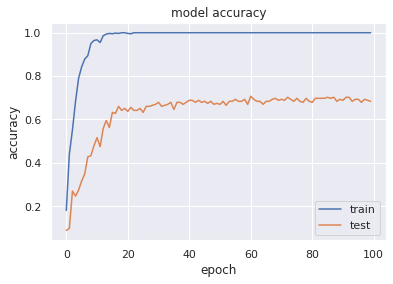

In [ ]:
# Model Performance (Measurement = Accuracy)
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

In [ ]:
from tensorflow.keras import layers, models, optimizers
input_shape = (trnx.shape[2],trnx.shape[1],3)
print(input_shape)
cnn_model = models.Sequential()

cnn_model.add(layers.GaussianNoise(0.2, input_shape=input_shape))
cnn_model.add(layers.Conv2D(8,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Conv2D(16,(2,2), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))


cnn_model.add(layers.Conv2D(24,(3,3), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))


cnn_model.add(layers.Conv2D(32,(4,4), padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Activation("relu"))
cnn_model.add(layers.Dropout(0.2))
cnn_model.add(layers.MaxPooling2D((2,2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(units = 1000, activation = "relu"))
cnn_model.add(layers.Dense(units = 11, activation = "softmax"))

# opt = optimizers.Adam(learning_rate=0.001)
cnn_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

(224, 224, 3)


In [ ]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gaussian_noise_5 (GaussianN  (None, 224, 224, 3)      0         
 oise)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 224, 224, 8)       104       
                                                                 
 batch_normalization_20 (Bat  (None, 224, 224, 8)      32        
 chNormalization)                                                
                                                                 
 activation_20 (Activation)  (None, 224, 224, 8)       0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 112, 112, 8)      0         
 g2D)                                                            
                                                      

In [ ]:
histroy = cnn_model.fit(trnx_reshaped, trny, validation_data = [tstx_reshaped,tsty], batch_size = 24, epochs = 100)

Epoch 1/100
27/27 [==============================] - 1s 22ms/step - loss: 4.7636e-04 - accuracy: 1.0000 - val_loss: 1.4024 - val_accuracy: 0.6698
Epoch 2/100
27/27 [==============================] - 1s 20ms/step - loss: 5.6109e-04 - accuracy: 1.0000 - val_loss: 1.4133 - val_accuracy: 0.6512
Epoch 3/100
27/27 [==============================] - 1s 19ms/step - loss: 5.0565e-04 - accuracy: 1.0000 - val_loss: 1.4189 - val_accuracy: 0.6512
Epoch 4/100
27/27 [==============================] - 1s 20ms/step - loss: 5.6265e-04 - accuracy: 1.0000 - val_loss: 1.4064 - val_accuracy: 0.6651
Epoch 5/100
27/27 [==============================] - 1s 20ms/step - loss: 3.8815e-04 - accuracy: 1.0000 - val_loss: 1.4031 - val_accuracy: 0.6605
Epoch 6/100
27/27 [==============================] - 1s 20ms/step - loss: 5.9615e-04 - accuracy: 1.0000 - val_loss: 1.3834 - val_accuracy: 0.6791
Epoch 7/100
27/27 [==============================] - 1s 20ms/step - loss: 4.3924e-04 - accuracy: 1.0000 - val_loss: 1.3788 -

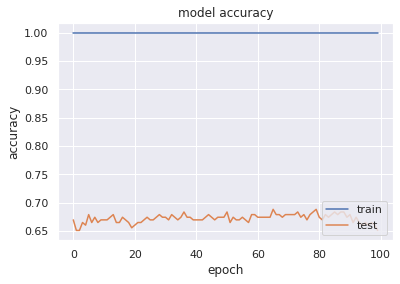

In [ ]:
# Model Performance (Measurement = Accuracy)
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()